Dataset with students data extracted from Unir archive.  
Geodataframes extracted from the openlibraries https://datosabiertos.esri.co/ and https://sites.google.com/site/seriescol/shapes

# Libraries and datasets loading

In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Default plot size is set.
plt.rcParams['figure.figsize'] = [15, 15]

# Geodataframes and dataset are loaded.
geodata = gpd.read_file('geodata-NarinoPutumayo-SpaceSyntax.gpkg')

df_uni = pd.read_csv('dataset.csv')

# 1.- Expand the Space Syntax and Geodata infered values

In [2]:
# Recover geometrical data
geodata['area'] = geodata['geometry'].area
geodata['perimeter'] = geodata['geometry'].length
geodata['centroid'] = geodata['geometry'].centroid
geodata['centroid_x'] = geodata['centroid'].x
geodata['centroid_y'] = geodata['centroid'].y

# Drop all columns but the following ones
geodata.drop(geodata.columns.difference(['NOMBRE_MPI','Morphological Ratio','Northing to closest centroid',
                                         'Easting to closest centroid','Direction to closest centroid',
                                        'Northing Average to centroids','Easting Average to centroid',
                                        'Direction Average to centroid','area','perimeter','centroid_x','centroid_y']), 1, inplace=True)

geodata

,NOMBRE_MPI,Morphological Ratio,Northing to closest centroid,Easting to closest centroid,Direction to closest centroid,Northing Average to centroids,Easting Average to centroid,Direction Average to centroid,area,perimeter,centroid_x,centroid_y
0,SANTA BARBARA (ISCUANDE),0.34,-13254.75,507.71,South East,-22401.34,-35427.63,South West,1.489004e+09,253266.113238,572770.859047,754176.993382
1,PUERTO GUZMAN,0.90,-7740.11,-55773.94,South West,3462.82,-79074.92,North West,3.924152e+09,341318.902967,796040.214500,574040.673451
2,LA TOLA,0.61,-11360.91,-7364.81,South West,-7486.51,253.85,South East,4.964240e+08,157881.096218,531554.436747,745316.607848
3,PUERTO LEGUIZAMO,1.14,75618.08,-90156.27,North West,57435.56,-157540.25,North West,1.067209e+10,748288.994710,886196.485788,498422.594422
4,OLAYA HERRERA (BOCAS DE SATINGA),0.55,11360.91,7364.81,North East,5767.89,8846.12,North East,5.958198e+08,142768.255252,524189.630437,733955.695647
...,...,...,...,...,...,...,...,...,...,...,...,...
72,SANDONA,0.82,-8940.91,504.49,South East,-1799.61,-516.90,South West,1.186036e+08,57571.400076,621159.418148,636251.280409
73,TUQUERRES,0.76,9651.88,4415.68,North East,-1015.47,7896.14,South East,1.968204e+08,69371.182669,600228.741585,619974.121068
74,TUMACO,0.83,38814.78,30328.04,North East,33135.56,39688.10,North East,3.524236e+09,284664.946721,486046.260662,667514.983437
75,IPIALES,0.44,19554.25,-2236.95,North West,32215.98,-4920.72,North West,1.966537e+09,241152.103564,631820.278473,554736.920314


In [3]:
dfinal = df_uni.merge(geodata, on='NOMBRE_MPI', how = 'inner')

In [4]:
dfinal.to_csv("df_uni_expanded.csv", encoding='utf-8-sig')

# 2.- Expanded data analysis

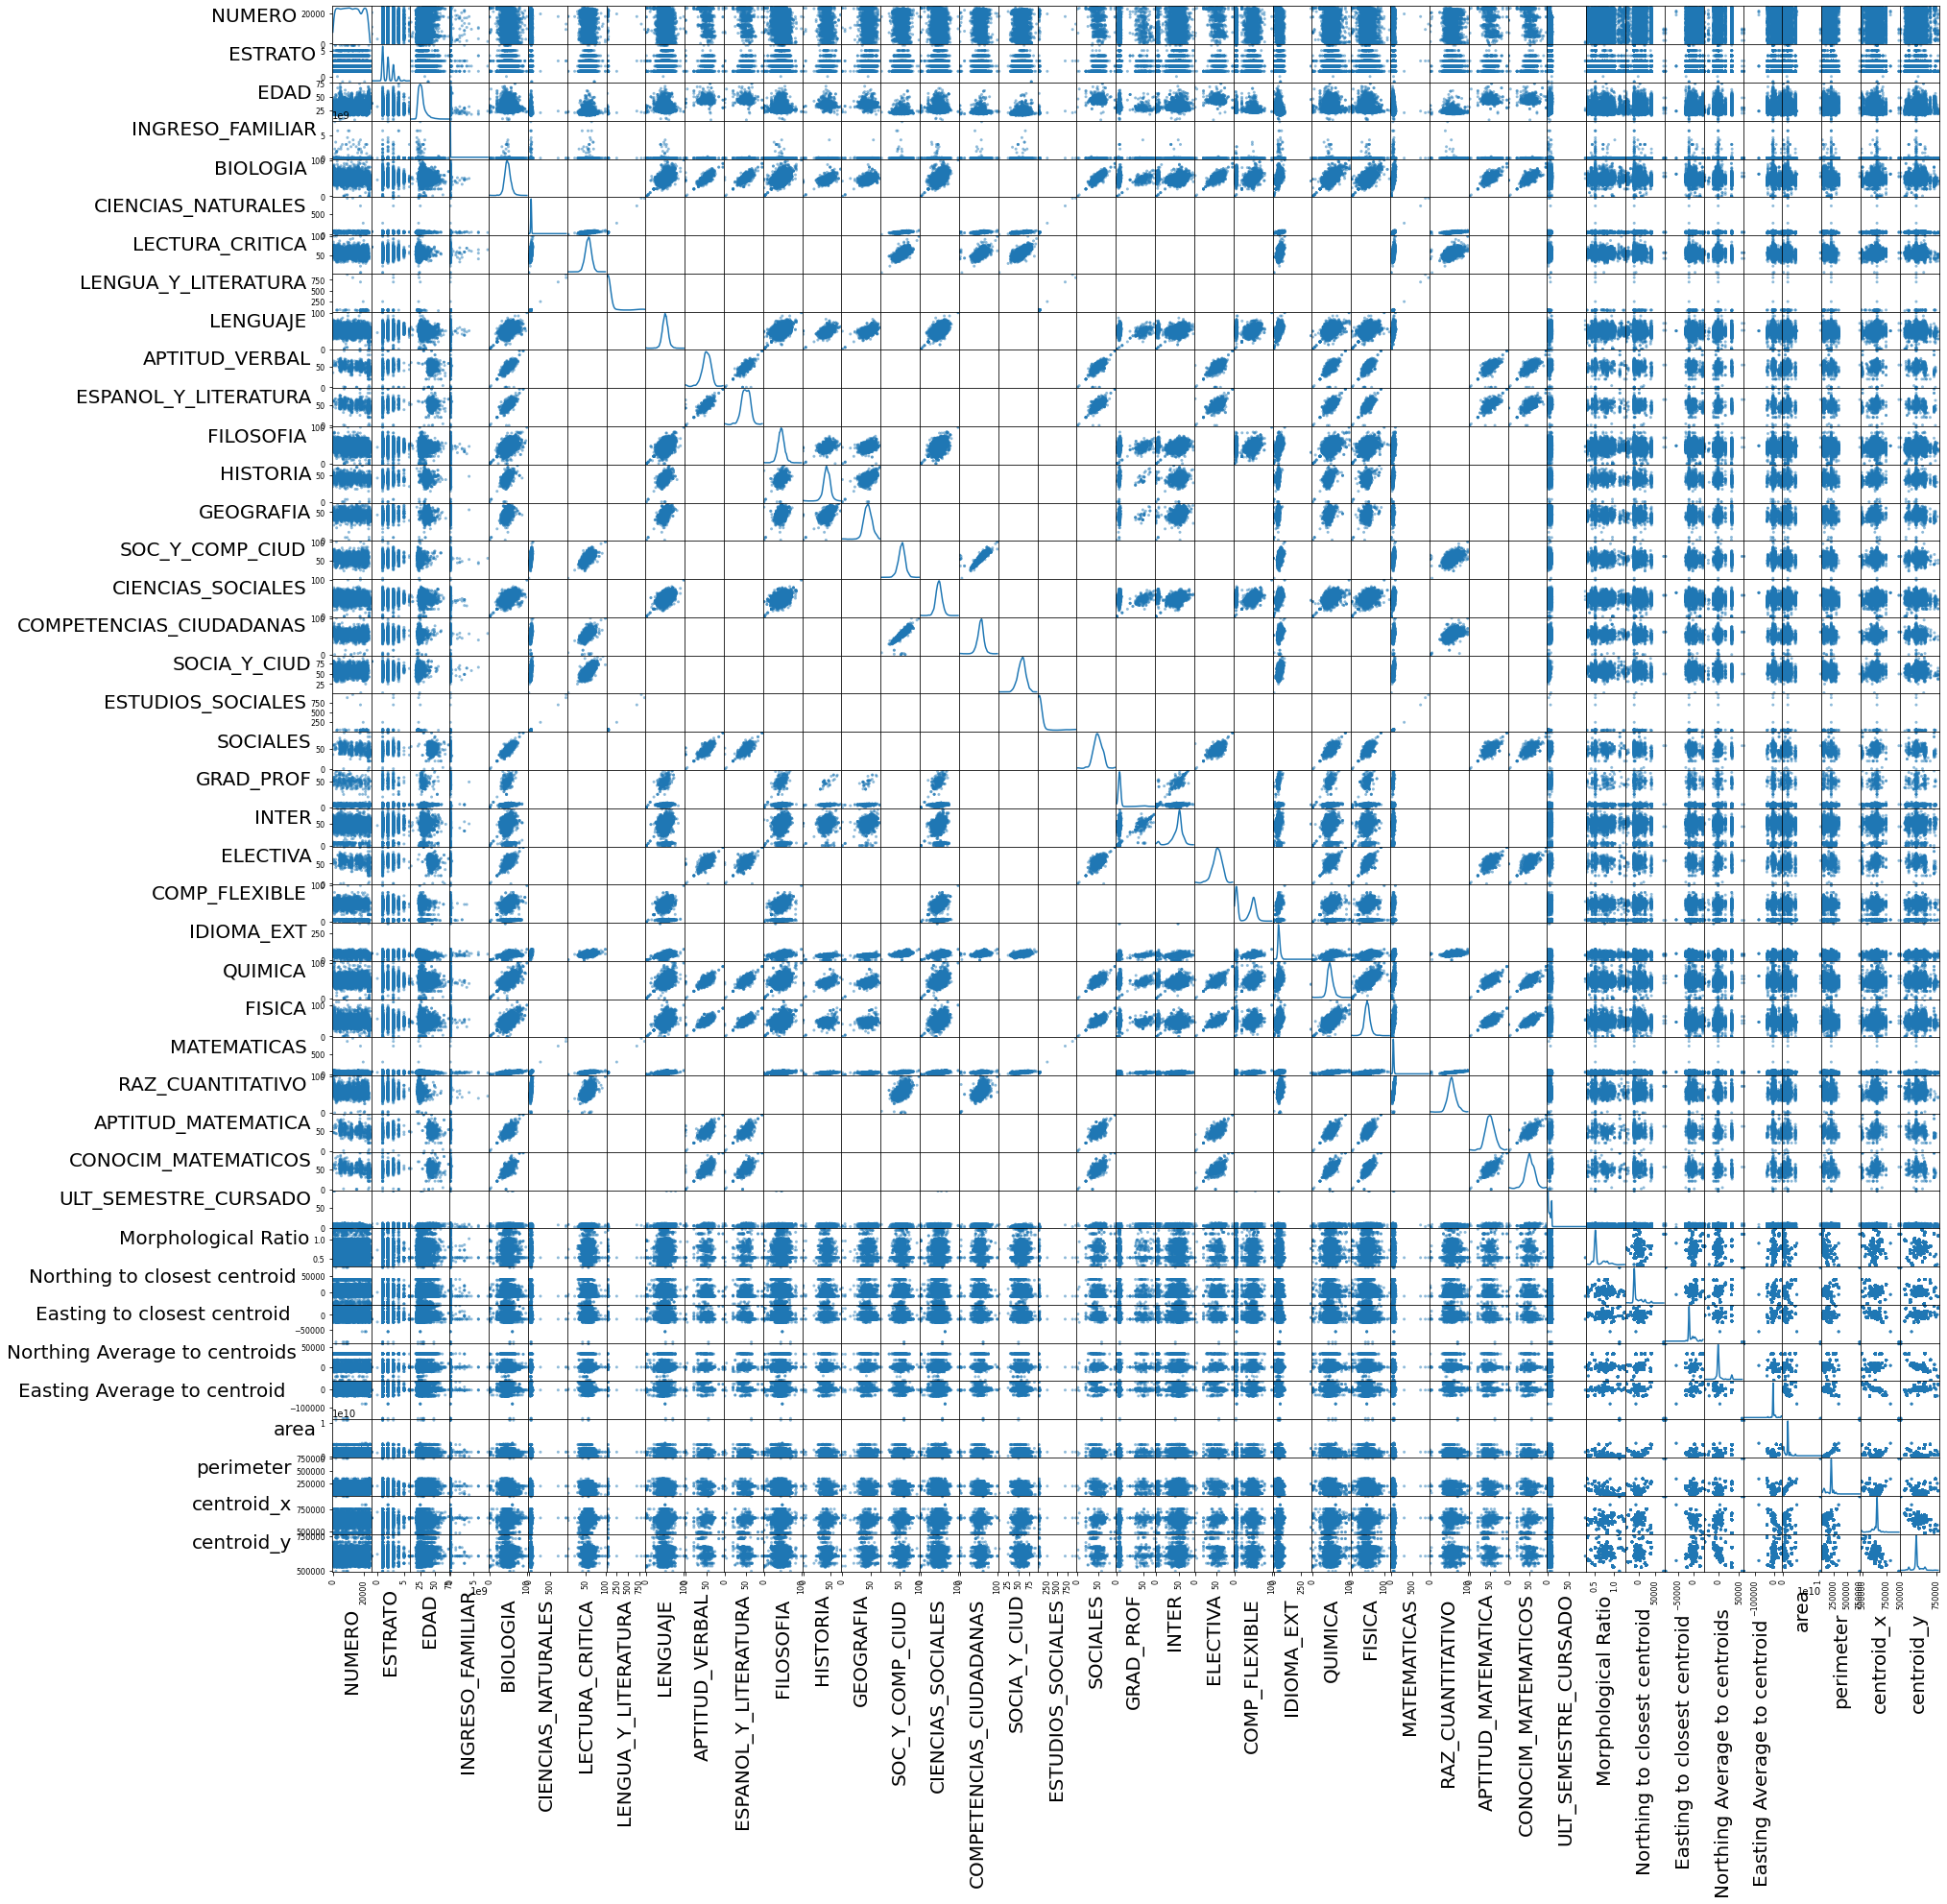

In [8]:
# Scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(
    dfinal,
    figsize  = [30, 30],
    # marker   = ".",
    # s        = 0.2,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0, ha='right')
    
plt.savefig("scatter_matrix_Expanded.jpg")

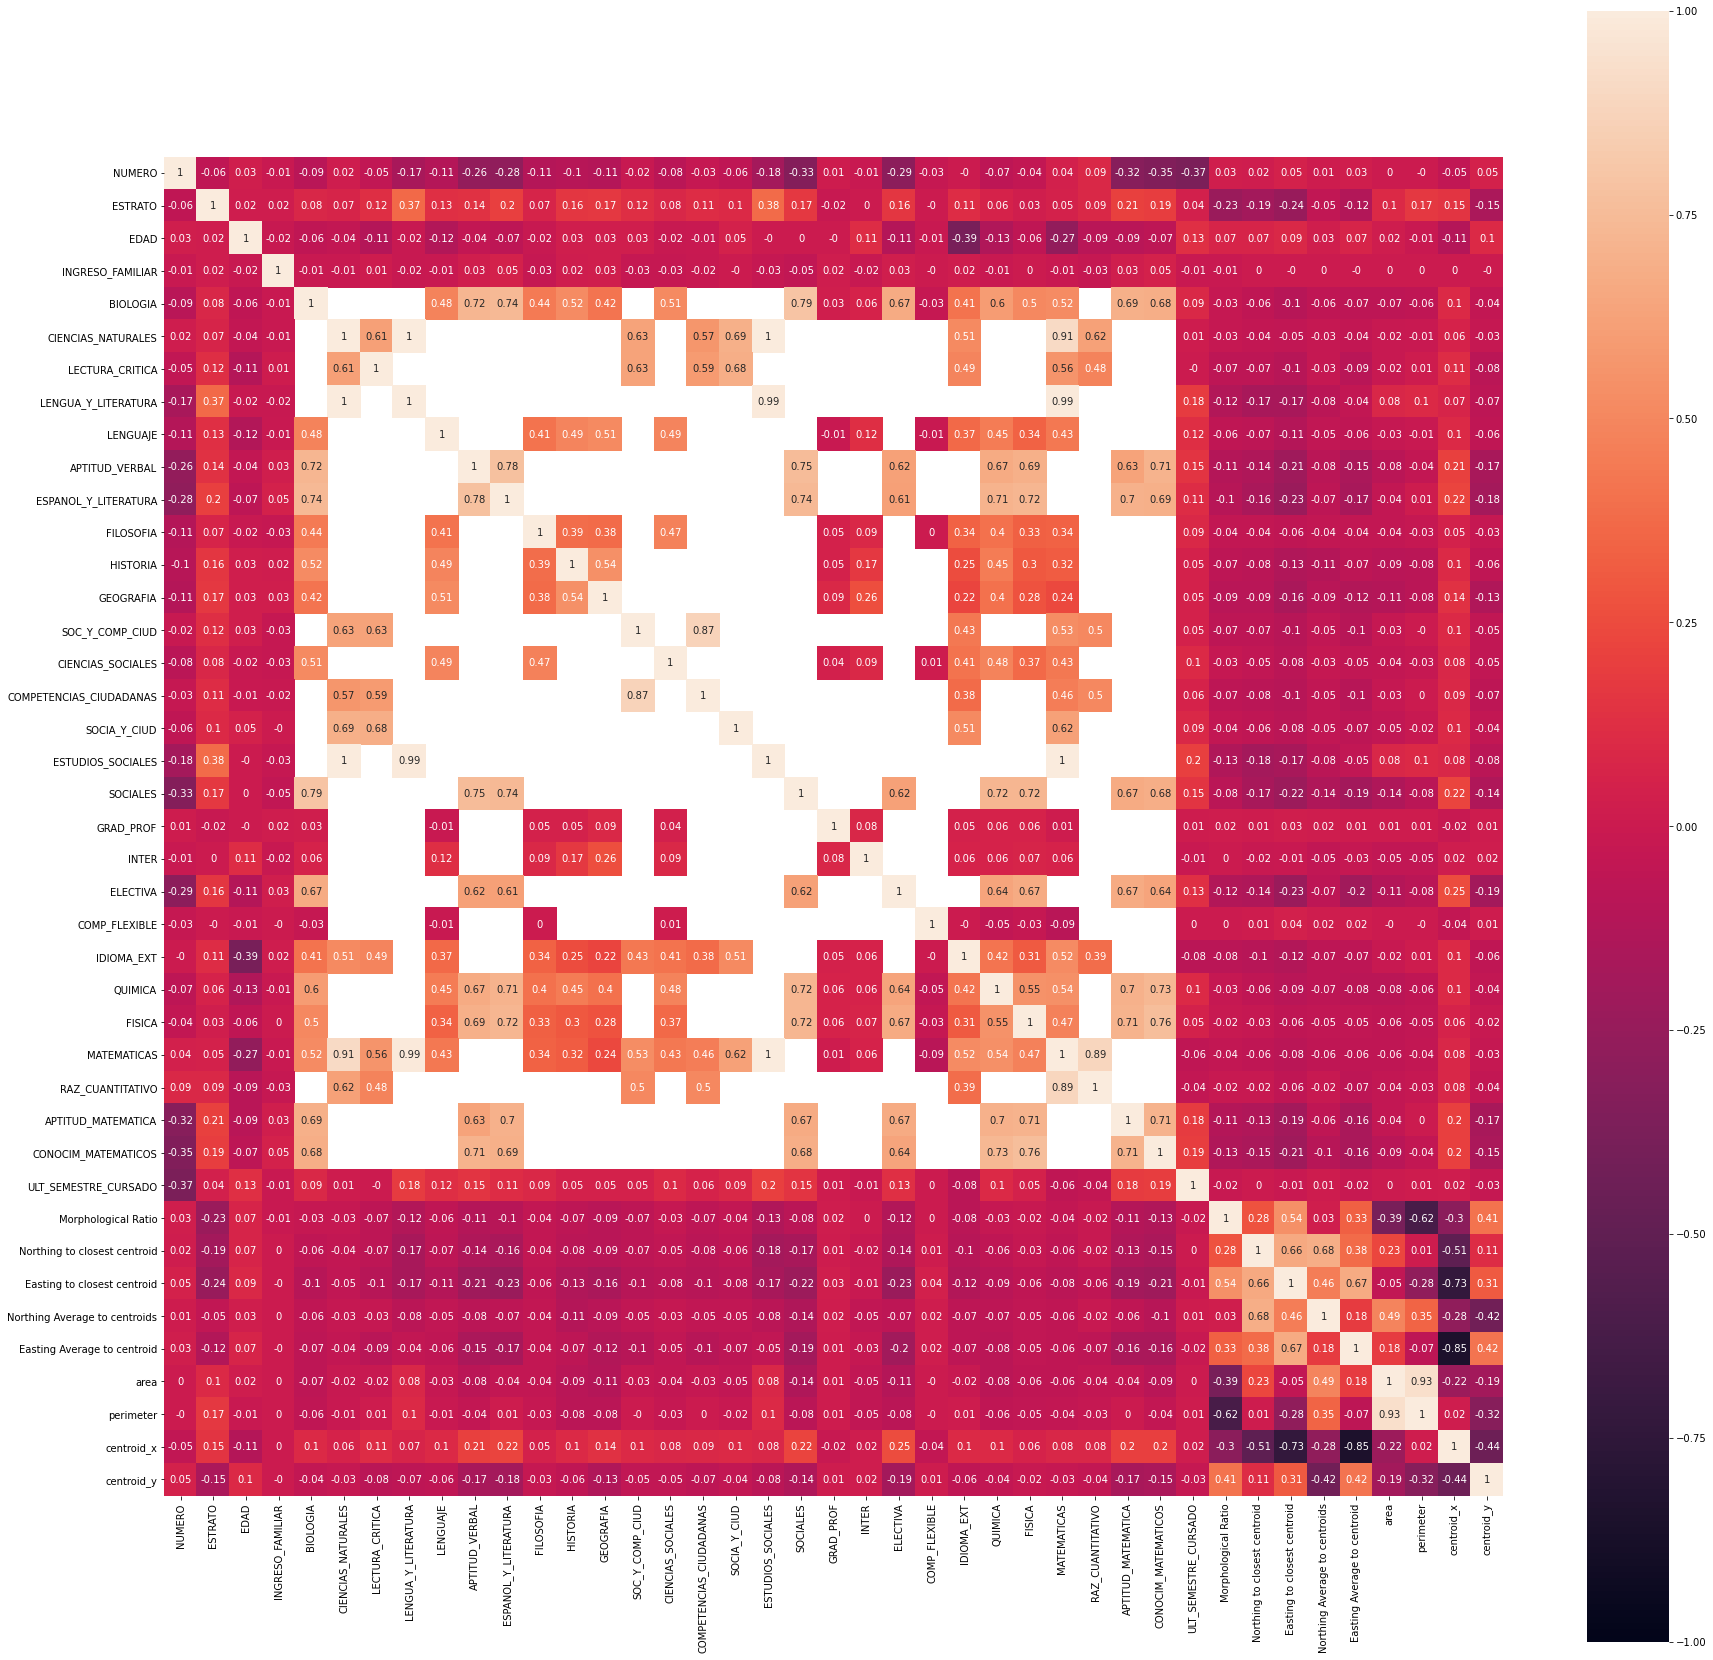

In [9]:
import seaborn as sb 

# Correlation matrix
corrMatrix = dfinal.corr()

plt.rcParams['figure.figsize'] = 30, 30
data = np.round(corrMatrix, 2)
sb.heatmap(data, annot = True, vmin=-1, vmax=1, square=True) 
plt.savefig('correlation_matrix_Expanded.pdf') 

# 3.- Data process

In [5]:
dfinal = pd.read_csv('df_uni_expanded-postprocessing.csv')

#Drop empty rows in ULT_SEMESTRE_CURSADO
dfinal = dfinal.loc[dfinal['ULT_SEMESTRE_CURSADO'].notnull()]

#Isolate rows with ULTIMA_MATRICULA in the last year (2018-2019)
no_deserted = dfinal.loc[dfinal['ULT_MAT=2018-2019'] == 'SI']

#Isolate rows with ULT_SEMESTRE_CURSADO below 10
no_deserted = no_deserted.loc[no_deserted['ULT_SEM<10'] == 'SI']

print("Total", dfinal.shape)
print("Deserted",no_deserted.shape)

no_deserted = (no_deserted.shape[0]/dfinal.shape[0])*100
deserted = 100-no_deserted

print("No deserted is " + str(round(no_deserted,2)) + "% of the total")
print("Deserted is " + str(round(deserted,2)) + "% of the total")

Total (18092, 59)
Deserted (8330, 59)
No deserted is 46.04% of the total
Deserted is 53.96% of the total


In [6]:
def Deserted (row):
    if (row['ULT_MAT=2018-2019'] == 'SI') and (row['ULT_SEM<10'] == 'SI'):
        return (int(0.0))
    else:
        return (int(1.0))

In [7]:
dfinal['DESERTED'] = dfinal.apply (lambda row: Deserted(row), axis=1)

In [8]:
dfinal.to_csv("df_uni_expanded-DESERTED.csv", encoding='utf-8-sig')

# 4.- Random Forests analysis

In [9]:
# Numerical columns and categorical columns
cols = dfinal.columns   
num_cols =  dfinal._get_numeric_data()

## 4.1. ORIGINAL REGRESSION TEST WITHOUT SPATIAL DATA

In [11]:
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Test without spatial data
no_needed = ['DESERTED','ULT_SEMESTRE_CURSADO','Morphological Ratio','Northing to closest centroid','Easting to closest centroid',
            'Northing Average to centroids','Easting Average to centroid','area','perimeter','centroid_x','centroid_y']

X = num_cols.drop(no_needed, axis=1)     #X_Variables, all but the label
y = num_cols['DESERTED']                 #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])
y_pred = regr.predict(X)
print('MAE', metrics.mean_absolute_error(y, y_pred))  
print('MSE', metrics.mean_squared_error(y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE 0.1984956170402785
MSE 0.08497109658507157
RMSE: 0.2914980215800299


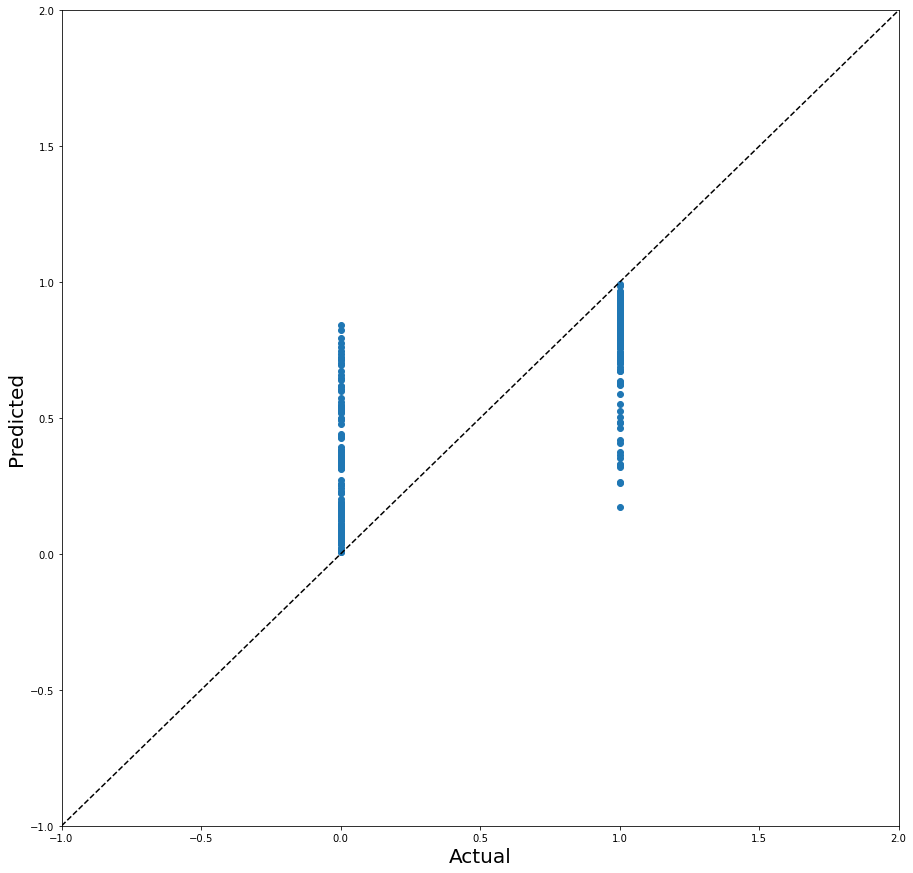

In [12]:
fig=plt.figure()
ax=fig.add_subplot()

plt.plot([-1, 2], [-1, 2], linestyle='dashed', color='black')
plt.scatter(y[:300],y_pred[:300])
plt.xlabel('Actual', size=20)
plt.ylabel('Predicted', size=20)
ax.set(xlim=(-1, 2), ylim=(-1, 2))

plt.show()

## 4.2. REGRESSION TEST WITH SPATIAL DATA

In [13]:
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Test with spatial data

X = num_cols.drop('DESERTED', axis=1) #X_Variables, all but the label
y = num_cols['DESERTED']              #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])
y_pred = regr.predict(X)
print('MAE', metrics.mean_absolute_error(y, y_pred))  
print('MSE', metrics.mean_squared_error(y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE 0.13346944888832393
MSE 0.05363839579701787
RMSE: 0.23159964550278972


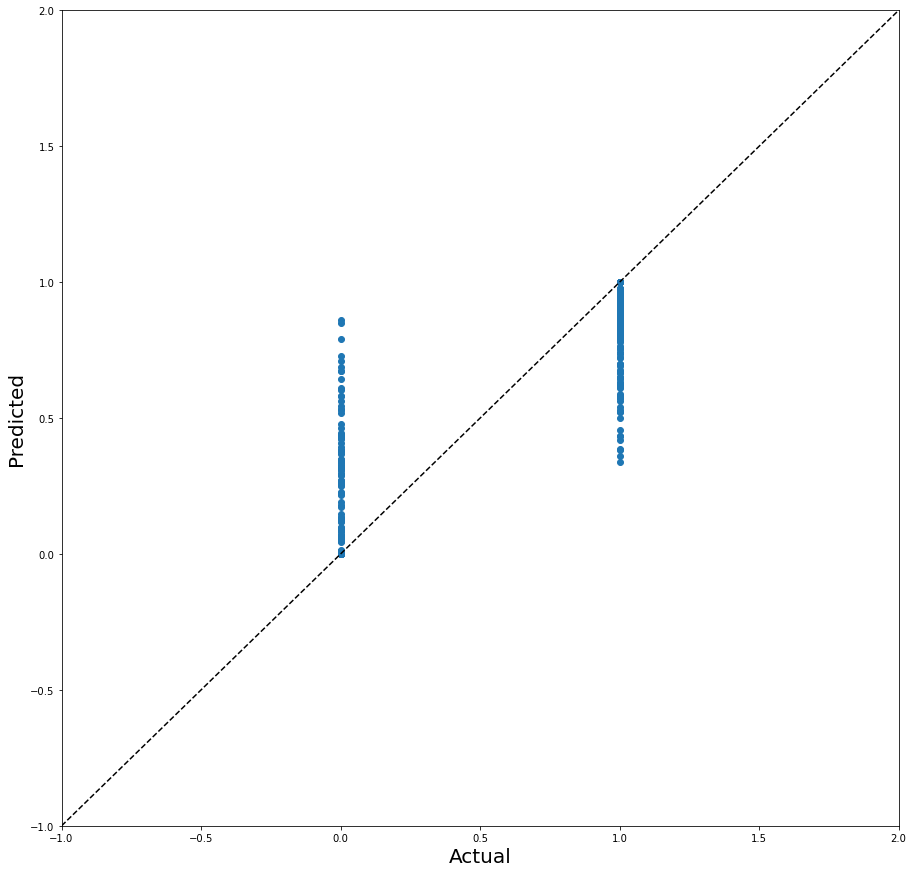

In [46]:
fig=plt.figure()
ax=fig.add_subplot()

plt.plot([-1, 2], [-1, 2], linestyle='dashed', color='black')
plt.scatter(y[:300],y_pred[:300])
plt.xlabel('Actual', size=20)
plt.ylabel('Predicted', size=20)
ax.set(xlim=(-1, 2), ylim=(-1, 2))

plt.show()

## 4.3. CLASSIFICATION TEST WITHOUT SPATIAL DATA

In [48]:
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Test without spatial data
no_needed = ['DESERTED','ULT_SEMESTRE_CURSADO','Morphological Ratio','Northing to closest centroid','Easting to closest centroid',
            'Northing Average to centroids','Easting Average to centroid','area','perimeter','centroid_x','centroid_y']

X = num_cols.drop(no_needed, axis=1)     #X_Variables, all but the label
y = num_cols['DESERTED']                 #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])
y_pred = clf.predict(X)
print('MAE', metrics.mean_absolute_error(y, y_pred))  
print('MSE', metrics.mean_squared_error(y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("-----------------------------------------------------")
print('Confusion Matrix:')
print(metrics.confusion_matrix(y, y_pred) )
print(metrics.classification_report(y, y_pred) )

MAE 0.014923723192571303
MSE 0.014923723192571303
RMSE: 0.12216269149200709
-----------------------------------------------------
Confusion Matrix:
[[8154  176]
 [  94 9668]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8330
           1       0.98      0.99      0.99      9762

    accuracy                           0.99     18092
   macro avg       0.99      0.98      0.98     18092
weighted avg       0.99      0.99      0.99     18092



C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


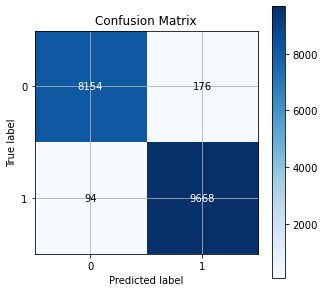

In [49]:
import scikitplot.plotters as skplt
plt.rcParams['figure.figsize'] = [5, 5]
skplt.plot_confusion_matrix(y, y_pred)
plt.show()

Random Classifier line:  ROC AUC=0.500
RF Without Spatial Data: ROC AUC=0.873


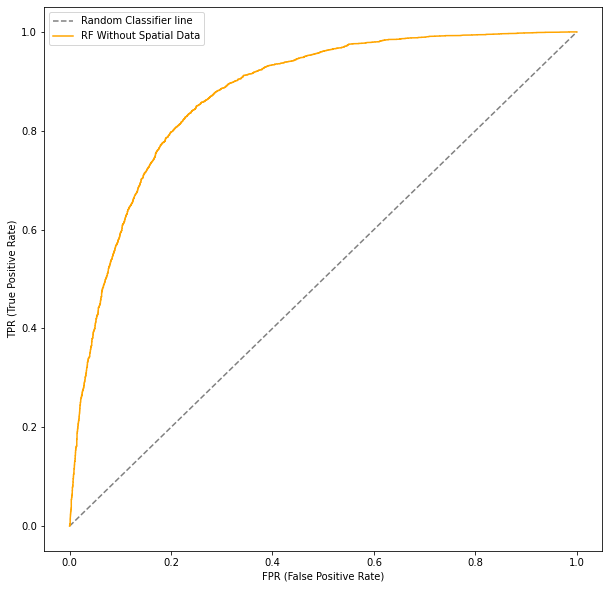

In [49]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = [10, 10]

# Test without spatial data
no_needed = ['DESERTED','ULT_SEMESTRE_CURSADO','Morphological Ratio','Northing to closest centroid','Easting to closest centroid',
            'Northing Average to centroids','Easting Average to centroid','area','perimeter','centroid_x','centroid_y']

X = num_cols.drop(no_needed, axis=1)     #X_Variables, all but the label
y = num_cols['DESERTED']                 #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = RandomForestClassifier(max_depth=20, random_state=0)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Random Classifier line:  ROC AUC=%.3f' % (ns_auc))
print('RF Without Spatial Data: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', color= "grey", label='Random Classifier line')
pyplot.plot(lr_fpr, lr_tpr, color= "orange", label='RF Without Spatial Data')
# axis labels
pyplot.xlabel('FPR (False Positive Rate)')
pyplot.ylabel('TPR (True Positive Rate)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 4.4. CLASSIFICATION TEST WITH SPATIAL DATA

In [20]:
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Test with spatial data
X = num_cols.drop('DESERTED', axis=1) #X_Variables, all but the label
y = num_cols['DESERTED']              #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

clf = RandomForestClassifier(max_depth=20, random_state=0)
y_score = clf.fit(X, y)

X = X.reshape(-X.shape[0],X.shape[1])
y_pred = clf.predict(X)
print('MAE', metrics.mean_absolute_error(y, y_pred))  
print('MSE', metrics.mean_squared_error(y, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("-----------------------------------------------------")
print('Confusion Matrix:')
print(metrics.confusion_matrix(y, y_pred) )
print(metrics.classification_report(y, y_pred) )

MAE 0.001713464514702631
MSE 0.001713464514702631
RMSE: 0.04139401544550409
-----------------------------------------------------
Confusion Matrix:
[[8301   29]
 [   2 9760]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8330
           1       1.00      1.00      1.00      9762

    accuracy                           1.00     18092
   macro avg       1.00      1.00      1.00     18092
weighted avg       1.00      1.00      1.00     18092



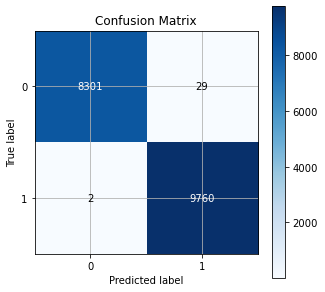

In [47]:
import scikitplot.plotters as skplt
plt.rcParams['figure.figsize'] = [5, 5]
skplt.plot_confusion_matrix(y, y_pred)
plt.show()

Random Classifier line: ROC AUC=0.500
RF With Spatial Data:   ROC AUC=0.936


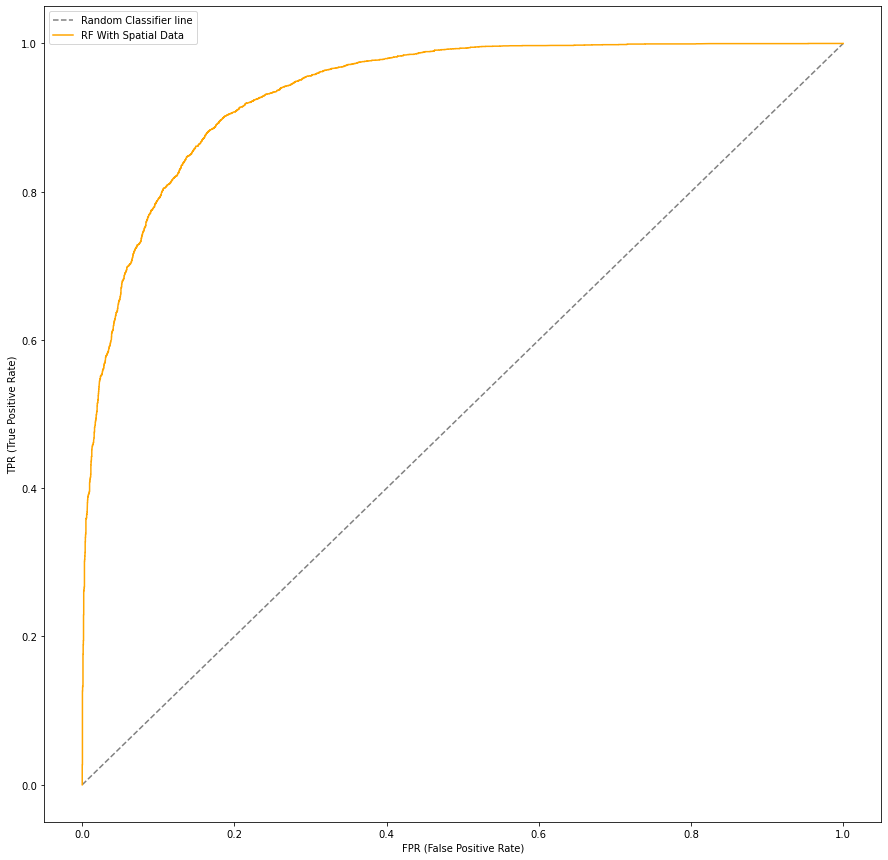

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = [10, 10]

# Test with spatial data
X = num_cols.drop('DESERTED', axis=1) #X_Variables, all but the label
y = num_cols['DESERTED']              #y_Labels to classify
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = RandomForestClassifier(max_depth=20, random_state=0)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Random Classifier line: ROC AUC=%.3f' % (ns_auc))
print('RF With Spatial Data:   ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', color= "grey", label='Random Classifier line')
pyplot.plot(lr_fpr, lr_tpr, color= "orange", label='RF With Spatial Data')
# axis labels
pyplot.xlabel('FPR (False Positive Rate)')
pyplot.ylabel('TPR (True Positive Rate)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

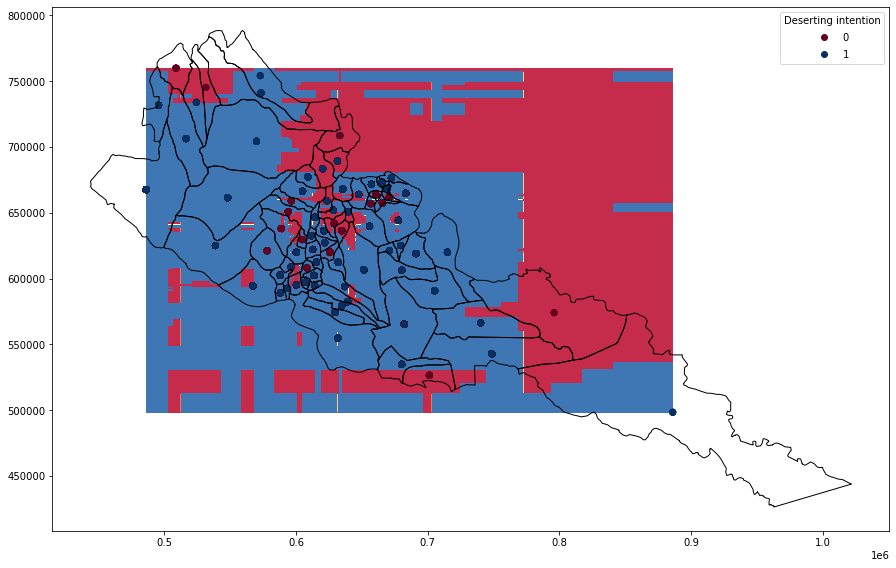

In [38]:
def plot_decision_boundary(X,y):
    plt.rcParams['figure.figsize'] = [15, 15]
    
    clf = RandomForestClassifier(max_depth=50, random_state=0)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    h=80 # mesh step

    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    
    surface = ax.contourf(xx, yy, z, cmap=plt.cm.Spectral)
    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu')
    legend1 = ax.legend(*points.legend_elements(),
                    loc="upper right", title="Deserting Intention")
    geodata.plot(color='none', edgecolor='black', ax=ax)
    
X = np.vstack((num_cols['centroid_x'], num_cols['centroid_y'])).T
plot_decision_boundary(X,y)